In [53]:
import json
import pandas as pd
from plotnine import *
from adjustText import adjust_text

In [2]:
d = pd.read_json("sexdetermine.json")

In [3]:
d = d.drop(['tool_name','version'], axis=0).drop('Metadata', axis=1)

In [4]:
d = d.T

,RateErrX,YSnps,Snps Autosomal,NrY,NrX,RateY,RateErrY,XSnps,NR Aut,RateX
s02-hg19.sorted.bam,0.000290,59373566.0,2.881050e+09,23122.0,12784634.0,0.004773,0.000031,155270560.0,235072532.0,1.009132
Lib3_6-hg19.sorted.bam,0.000605,59373566.0,2.881050e+09,5009.0,2677060.0,0.004721,0.000067,155270560.0,51488589.0,0.964737
Lib3_9-hg19.sorted.bam,0.000604,59373566.0,2.881050e+09,3592.0,3044411.0,0.003166,0.000053,155270560.0,55046653.0,1.026205
Lib4_1-hg19.sorted.bam,0.000393,59373566.0,2.881050e+09,15857.0,5804307.0,0.006602,0.000052,155270560.0,116554750.0,0.924021
Lib4_2-hg19.sorted.bam,0.000908,59373566.0,2.881050e+09,24038.0,227410.0,0.118334,0.000764,155270560.0,9857050.0,0.428079
Lib4_3-hg19.sorted.bam,0.004519,59373566.0,2.881050e+09,281.0,12090.0,0.029808,0.001779,155270560.0,457431.0,0.490413
Lib4_4-hg19.sorted.bam,0.003833,59373566.0,2.881050e+09,0.0,14846.0,0.000000,0.000000,155270560.0,597195.0,0.461270
Lib4_5-hg19.sorted.bam,0.007427,59373566.0,2.881050e+09,0.0,13335.0,0.000000,0.000000,155270560.0,294942.0,0.838915
Lib4_6-hg19.sorted.bam,0.000336,59373566.0,2.881050e+09,13101.0,7535157.0,0.004091,0.000036,155270560.0,155400717.0,0.899707
Lib4_7-hg19.sorted.bam,0.000742,59373566.0,2.881050e+09,33327.0,1127731.0,0.059665,0.000327,155270560.0,27104224.0,0.772023


In [5]:
d['Ymin'] = d['RateY'] - d['RateErrY']
d['Ymax'] = d['RateY'] + d['RateErrY']
d['Xmin'] = d['RateX'] - d['RateErrX']
d['Xmax'] = d['RateX'] + d['RateErrX']
d = d.reset_index()


In [46]:
d['small_name'] = d['index'].str.split("-",expand=True)[0]

### Checking for the confidance interval

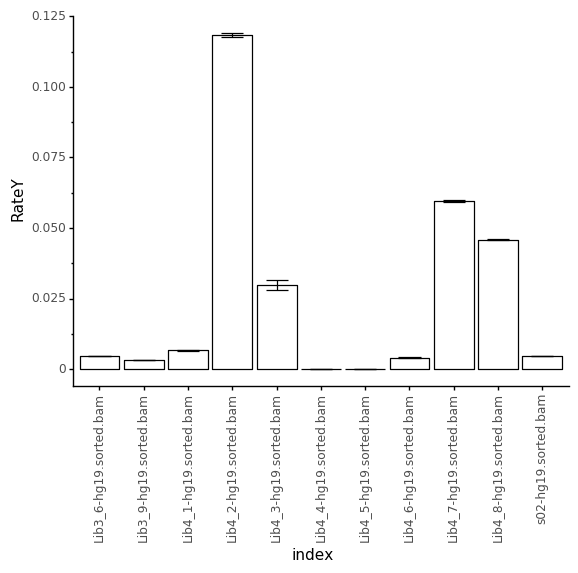

<ggplot: (7548511981)>

In [16]:
g = ggplot(d, aes(x='index', y='RateY')) 
g += geom_bar(stat='identity', fill='white', color='black') 
g += geom_errorbar(aes(x="index", ymin="Ymin",ymax="Ymax"))
g += theme_classic()
g += theme(axis_text_x=element_text(angle=90))
g

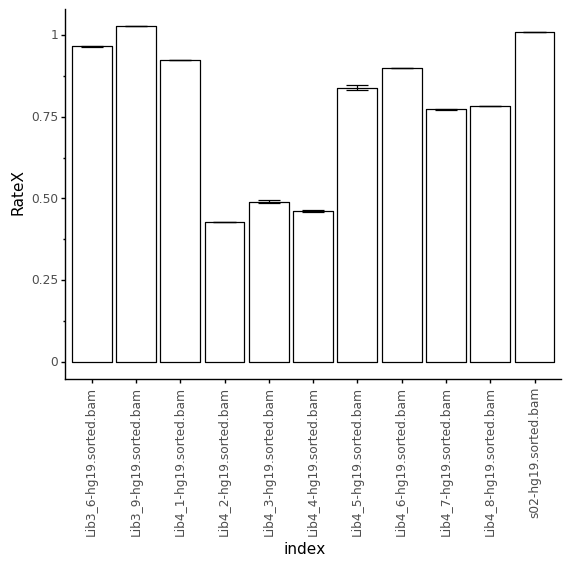

<ggplot: (7548206473)>

In [18]:
g = ggplot(d, aes(x='index', y='RateX')) 
g += geom_bar(stat='identity', fill='white', color='black') 
g += geom_errorbar(aes(x="index", ymin="Xmin",ymax="Xmax"))
g += theme_classic()
g += theme(axis_text_x=element_text(angle=90))
g

- **Male** : When the ratio of X and autosomal coverage (x/auto) is lower or equal than 0.75 and the ratio of Y and autosomal coverage (y/auto) is greater or equal than 0.25.
- **Female** : When the ratio of X and autosomal coverage (x/auto)  is greater than 0.75 and the ratio of Y and autosomal coverage (y/auto) is lower than 0.25

In [39]:
sex_text = pd.DataFrame()
sex_text['x'] = [0.4, 0.9, 0.9, 0.4]
sex_text['y'] = [0.1, 0.1, 0.9, 0.9]
sex_text['text'] = ['Unclear', 'Female', 'Unclear', 'Male']

/Users/borry/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/borry/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: sex_determination.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


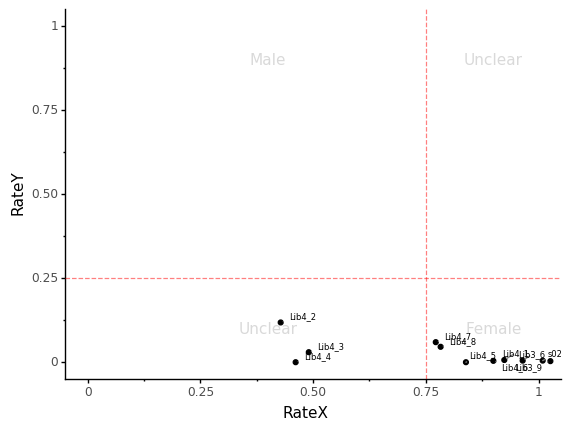

<ggplot: (7548373121)>

In [61]:
g = ggplot(d, aes(x='RateX',y='RateY')) 
g += geom_point()
g += geom_text(aes(label='small_name'), size=6, adjust_text= {
    'expand_points': (2, 4),
    'expand_objects': (2, 2),
    'arrowprops': {
        'arrowstyle': '-',
        'color': 'grey'
    },
    'on_basemap':True
})
g += geom_vline(xintercept=0.75, linetype='dashed', alpha=0.5, color='red')
g += geom_hline(yintercept=0.25, linetype='dashed', alpha=0.5, color='red')
g += geom_text(data=sex_text, mapping=aes(x='x',y='y', label='text'), alpha=0.3, color='grey')
g += theme_classic()
g += coord_cartesian(xlim=[0,1],ylim=[0,1])
g.save("sex_determination.png", dpi=300)
g